# Import List

In [1]:
import math
from typing import Any

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import (Lasso, LassoCV, LinearRegression,
                                  LogisticRegression, Ridge, RidgeCV)
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score,
                             mean_absolute_error, mean_squared_error,
                             precision_score, r2_score, recall_score)
from sklearn.model_selection import (GridSearchCV, ShuffleSplit,
                                     cross_val_score, cross_validate,
                                     train_test_split)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures


In [2]:
sns.set_theme(style="whitegrid", font="Verdana")


In [3]:
%matplotlib inline


# Bitrate Prediction (Regression)

## Data Reading (.csv)

In [4]:
# Reading train and test datasets (.csv files)
df_b_train = pd.read_csv(filepath_or_buffer="bitrate_prediction/bitrate_train.csv")
df_b_test = pd.read_csv(filepath_or_buffer="bitrate_prediction/bitrate_test.csv")

# Combining two dataframes (.csv)
df_b = pd.concat(objs=[df_b_train, df_b_test]).reset_index(drop=True)


## Data Exploration & Visualization

### Data Profiling

In [5]:
# Generating Pandas Profiling report
# ProfileReport(df=df_bitrate).to_file(output_file="df_b_before.html")


### Column Data Types

In [6]:
df_b.dtypes

fps_mean               float64
fps_std                float64
rtt_mean               float64
rtt_std                float64
dropped_frames_mean    float64
dropped_frames_std     float64
dropped_frames_max     float64
bitrate_mean           float64
bitrate_std            float64
target                 float64
dtype: object

### Pandas Head

In [7]:
df_b.head(10)


,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
0,24.4,0.516398,91.1,6.723921,0.0,0.0,0.0,460.5,7.648529,616.0
1,28.6,2.065591,99.7,15.923777,0.0,0.0,0.0,616.3,155.414893,565.0
2,30.0,0.000000,98.1,11.798776,0.0,0.0,0.0,565.2,9.077445,573.0
3,30.3,0.948683,99.4,13.014522,0.0,0.0,0.0,573.8,28.350191,585.0
4,29.9,0.316228,123.2,62.476307,0.0,0.0,0.0,585.8,59.458295,555.0
5,29.5,1.649916,131.2,114.257798,0.0,0.0,0.0,555.2,47.713963,456.0
6,24.3,0.483046,98.3,16.499495,0.0,0.0,0.0,456.7,9.428680,511.0
7,24.5,0.971825,141.9,103.814418,0.0,0.0,0.0,511.4,156.318905,675.0
8,30.0,0.000000,107.5,18.733511,0.0,0.0,0.0,675.5,88.334277,1129.0
9,30.0,0.471405,108.2,10.952422,0.0,0.0,0.0,1129.0,989.477079,560.0


### Pandas Describe

In [8]:
df_b.describe()


,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
count,607166.000000,607166.000000,607166.000000,607166.000000,607166.000000,607166.000000,607166.000000,607166.000000,607166.000000,607166.000000
mean,35.194745,1.697624,48.825605,12.830653,0.178591,0.472985,1.459881,7379.792667,1591.362279,7389.067782
std,10.883878,2.449773,91.725277,104.431783,1.606105,3.141200,9.626510,6038.430940,1697.270367,6036.306465
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.900000,0.316228,14.300000,0.699206,0.000000,0.000000,0.000000,2690.500000,385.677712,2707.750000
50%,30.000000,0.942809,31.400000,1.505545,0.000000,0.000000,0.000000,6240.700000,1108.057810,6250.000000
75%,43.400000,2.211083,56.400000,5.313505,0.000000,0.000000,0.000000,10086.875000,2230.062900,10091.300000
max,125.800000,307.167273,12898.400000,40721.933293,540.000000,291.878228,923.000000,64913.500000,31201.672303,64913.000000


### Missing Values

In [9]:
df_b.isna().any()


fps_mean               False
fps_std                False
rtt_mean               False
rtt_std                False
dropped_frames_mean    False
dropped_frames_std     False
dropped_frames_max     False
bitrate_mean           False
bitrate_std            False
target                 False
dtype: bool

__Observations__

Pure data is absent. Instead it is necessary to analyze `mean` and `std` columns.

All the columns are numeric.

*Describe (max)*: shows imbalance and the presence of outliners in the data.

Empty values are absent.

__Conclusions__

Data encoding is not applicable.

Data imputing is not applicable.

### Correlation Matrix

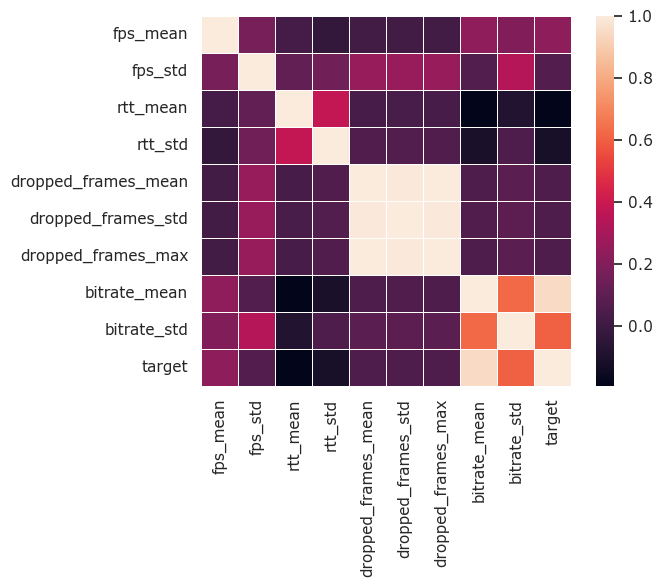

In [10]:
sns.heatmap(df_b.corr(method="spearman"), linewidths=.5, square=True)

plt.show()


__Observations__

`dropped_frames_mean`, `dropped_frames_std` and `dropped_frames_max` are highly correlated with each other.

`bitrate_mean`, `bitrate_std` and `target` are highly correlated with each other.

`fps_mean` (.2) and `rtt_mean` (.1) can be used for the bitrate prediction.

__Conclusions__

It is possible to drop secondary correlated features.

Linear Regression models will be poor in terms of metrics, as the dataset features barely correlate with `target`.

We might drop `bitrate_mean` and `bitrate_std` as the task is to predict `target`, which is bitrate itself.

### Box Plots (Data Distribution & Outliers)

In [11]:
def show_boxplot(data_frame: pd.DataFrame) -> None:
    """Plots boxplots of each feature in the dataset.

    Parameters
    ----------
    data_frame : pd.DataFrame

    Returns
    -------
    list
        boxplot whiskers
    """
    columns = 3
    rows = math.ceil(data_frame.shape[1] / columns)

    whiskers = []

    figure = plt.figure()
    figure.subplots_adjust(wspace=0.6, hspace=0.2)

    for index, column in enumerate(iterable=data_frame.columns):
        subplot = figure.add_subplot(rows, columns, index + 1)

        boxplot = subplot.boxplot(x=column, data=data_frame)
        subplot.set_title(label=column)

        subplot.figure.set_size_inches(w=rows * 2, h=rows * columns * 2)
        subplot.figure.set_dpi(val=120)

        whiskers.append(
            [
                boxplot["whiskers"][0].get_ydata()[1],
                boxplot["whiskers"][1].get_ydata()[1],
            ]
        )

    plt.show()

    return whiskers


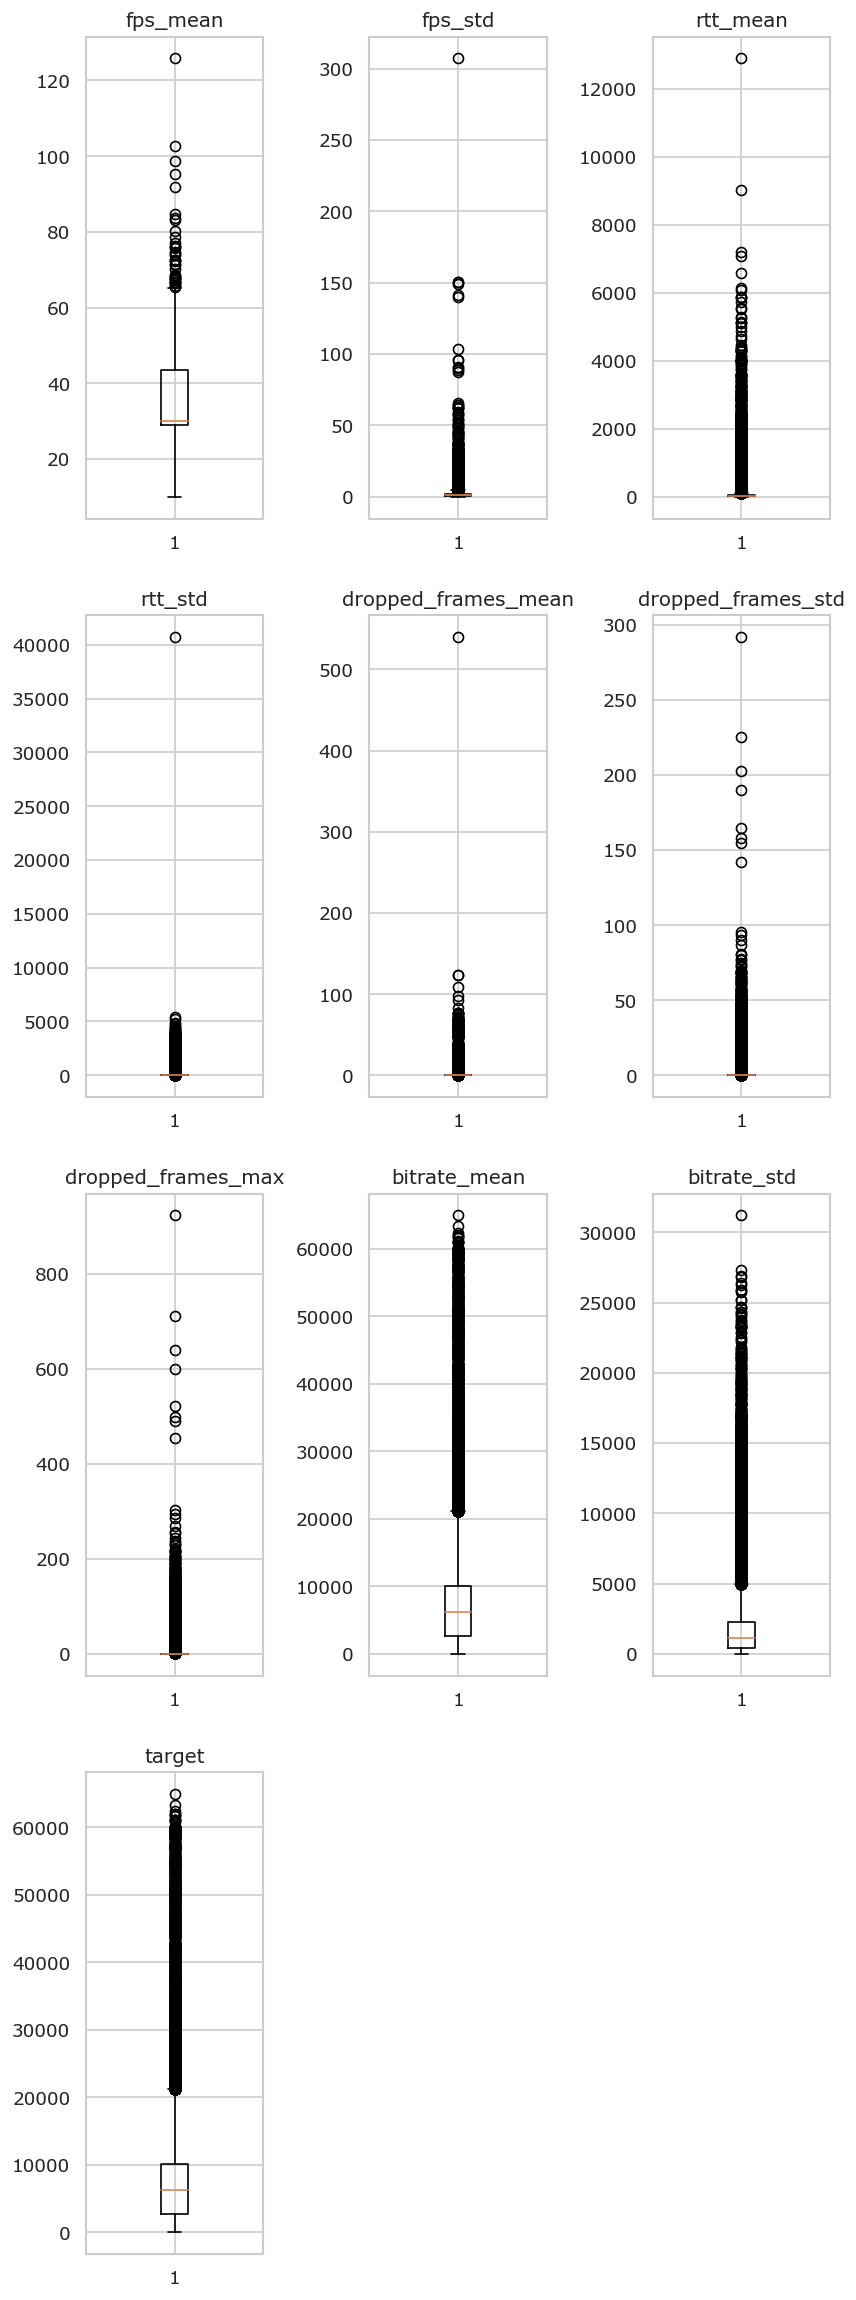

In [12]:
whiskers = show_boxplot(df_b)


__Observations__

Most boxplots are almost not readable.

Maximum values are quite high/low regarding the quantiles.

Most features have outliers.

__Conclusions__

In the above graph, can clearly see values above whiskers which are acting as the outliers. It is necessary to remove outliers.

### Pair Plot

In [13]:
# Too slow!
# sns.pairplot(data=df_b, hue="target", palette="rocket", diag_kind="hist")

# plt.show()


In [14]:
def show_pairplot(data_frame: pd.DataFrame, target_column: str, alpha: int = 0.005) -> None:
    """Shows pair plots of a dataset.

    Parameters
    ----------
    data_frame : pd.DataFrame

    target_column : str
        target column label
    alpha : float = 0.005
        transparency coefficient
    """
    row_index = 1

    rows = math.ceil(data_frame.shape[1] / 2) + 1
    columns = 3

    plot_color = "red"
    mean_color = "lightgray"

    data_frame_columns = data_frame.columns[:-1]

    figure = plt.figure()

    figure.subplots_adjust(wspace=0.4, hspace=0.4)
    figure.set_size_inches(w=16, h=32)
    figure.set_dpi(val=120)

    for index in range(len(data_frame_columns)):
        index *= 2

        if index + 1 < len(data_frame_columns):
            subplot = figure.add_subplot(rows, columns, row_index)
            subplot.set(
                xlabel=data_frame_columns[index], ylabel=data_frame_columns[index + 1]
            )
            subplot.grid(False)
            subplot.scatter(
                x=data_frame[data_frame_columns[index]],
                y=data_frame[data_frame_columns[index + 1]],
                c=plot_color,
                alpha=alpha,
            )
            subplot.axvline(
                x=np.mean(data_frame[data_frame_columns[index]]), c=mean_color
            )
            subplot.axhline(
                y=np.mean(data_frame[data_frame_columns[index + 1]]), c=mean_color
            )

            subplot = figure.add_subplot(rows, columns, row_index + 2)
            subplot.set(xlabel=data_frame_columns[index + 1], ylabel=target_column)
            subplot.grid(False)
            subplot.scatter(
                x=data_frame[data_frame_columns[index + 1]],
                y=data_frame[target_column],
                c=plot_color,
                alpha=alpha,
            )
            subplot.axvline(
                x=np.mean(data_frame[data_frame_columns[index + 1]]), c=mean_color
            )

        if index < len(data_frame_columns):
            subplot = figure.add_subplot(rows, columns, row_index + 1)
            subplot.set(xlabel=data_frame_columns[index], ylabel=target_column)
            subplot.grid(False)
            subplot.scatter(
                x=data_frame[data_frame_columns[index]],
                y=data_frame[target_column],
                c=plot_color,
                alpha=alpha,
            )
            subplot.axvline(
                x=np.mean(data_frame[data_frame_columns[index]]), c=mean_color
            )

        row_index += columns

    # Light gray lines indicate mean values
    plt.show()


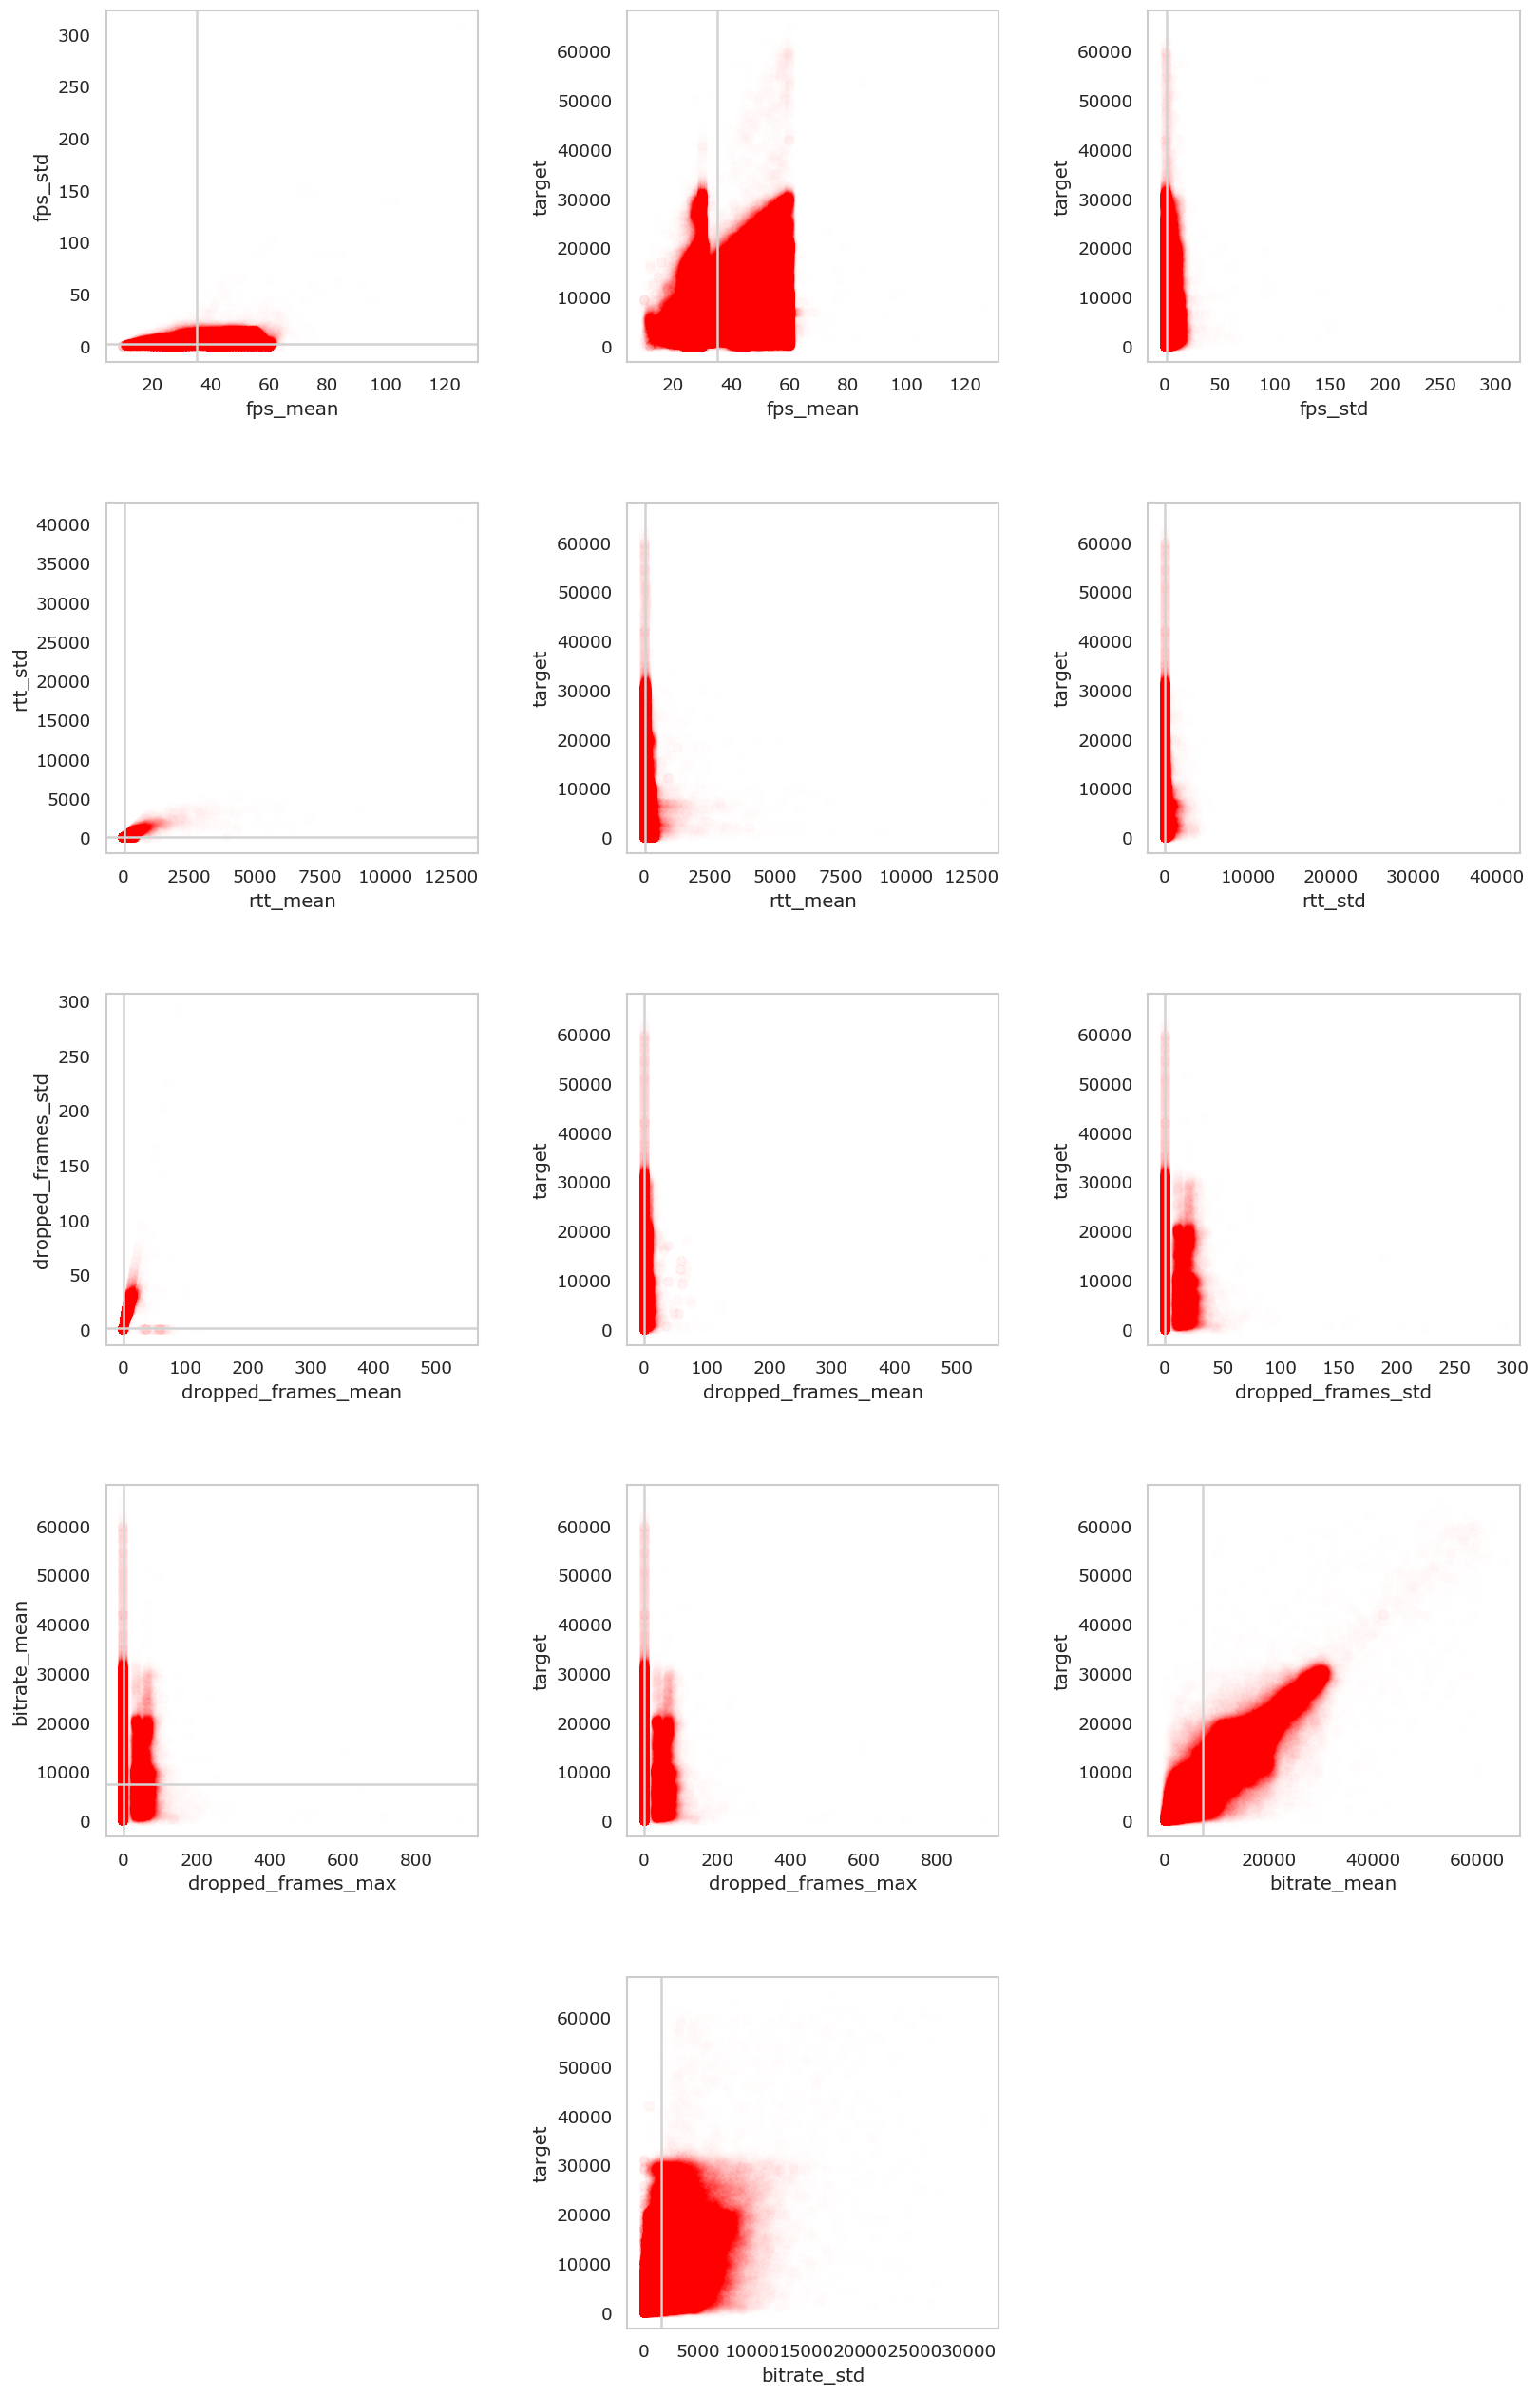

In [15]:
show_pairplot(data_frame=df_b, target_column="target")


__Observations__

There is no pure linear dependency between features and `target`.

The plot `fps_mean` to `target` has a subplot between `25 FPS` and `35 FPS` (axis `x`). This part can be independent, while the other values demonstrate correlation.

Features `fps_std`, `rtt_mean`, `rtt_std` have high values and might correlate with low `target` values.

Features `fps_std`, `rtt_std` have high values (distribution) relatively to the corresponding mean values.

Feature `dropped_frames` has zero values and does not correlate with `target` value.

__Conclusions__

It is possible to extract a binary feature so that `fps_mean` will show its independent values.

It is possible to extract binary features so that `fps_std`, `rtt_mean`, `rtt_std` will show high values to help a model predict low `target`.

It is possible to extract logariphmic features so that `fps_std`, `rtt_std` will show the distance between mean and high values.

We might drop `dropped_frames` as it has ≈ 80 % zero values. Or we might extract a feature which will show its occurance.

## Feature Engineering

__Algorithm__

* Data transformation.
* Features evaluation using coefficients of linear models.
* Outliers removal.
* Application of binary features.
* Application of logarithmic feature.
* Data scaling.
* Duplicates removal.

__Results__

The dataset has been reduced by ≈ 2 %.

In [16]:
df_b_e = df_b.copy()


In [17]:
def remove_outliers(data_frame: pd.DataFrame, whiskers: Any, padding: int = 2) -> None:
    """Remove outliers from a dataset.

    Parameters
    ----------
    data_frame : pd.DataFrame
    """
    # Exclude 'target'
    for index, column in enumerate(data_frame.columns[:-1]):
        lower_whisker = whiskers[index][0] - whiskers[index][0] * padding
        upper_whisker = whiskers[index][1] + whiskers[index][1] * padding

        data_frame = data_frame.query(
            f"{column} >= {lower_whisker} and {column} <= {upper_whisker}"
        )


In [18]:
# Outliers
remove_outliers(data_frame=df_b_e, whiskers=whiskers, padding=2)


In [19]:
# Logarithmic feature
df_b_e["rtt_std_log"] = df_b_e["rtt_std"].apply(lambda x: np.log(x) if x > 2 else x)


In [20]:
# Binary features
df_b_e["if_dropped_frames"] = df_b_e["dropped_frames_mean"] > 0
df_b_e["fps_25_35"] = (df_b_e["fps_mean"] < 25) & (df_b_e["fps_mean"] > 35)
df_b_e["fps_6"] = df_b_e["fps_std"] > 6
df_b_e["rtt_50"] = df_b_e["rtt_mean"] > 50
df_b_e["rtt_5"] = df_b_e["rtt_std"] > 5


In [21]:
# Redundant columns
df_b_e = df_b_e.drop(
    columns=[
        "fps_std",
        "dropped_frames_mean",
        "dropped_frames_std",
        "dropped_frames_max",
        "bitrate_mean",  # correlates with the 'target' column
        "bitrate_std",  # correlates with the 'target' column
    ],
    axis=1,
)


In [22]:
# Duplicates
df_b_e = df_b_e.drop_duplicates()


In [23]:
# Showing results
df_b_e.head()


,fps_mean,rtt_mean,rtt_std,target,rtt_std_log,if_dropped_frames,fps_25_35,fps_6,rtt_50,rtt_5
0,24.4,91.1,6.723921,616.0,1.905671,False,False,False,True,True
1,28.6,99.7,15.923777,565.0,2.767813,False,False,False,True,True
2,30.0,98.1,11.798776,573.0,2.467996,False,False,False,True,True
3,30.3,99.4,13.014522,585.0,2.566066,False,False,False,True,True
4,29.9,123.2,62.476307,555.0,4.134787,False,False,False,True,True


In [24]:
# After filtering
reduction = (1 - df_b_e.shape[0] / df_b.shape[0]) * 100

print(f"Before: {df_b.shape}.")
print(f"After: {df_b_e.shape}.")
print(f"Filtered Volume: {reduction:.0f} %.")


Before: (607166, 10).
After: (600051, 10).
Filtered Volume: 1 %.


### Features Scaling

In [25]:
X = df_b_e.drop(columns=["target"], axis=1)
y = df_b_e.target


In [26]:
# Scaler
X[:] = MinMaxScaler().fit_transform(X=X, y=y)


### Results

The algorithm managed to limit the amount of potential outliers.

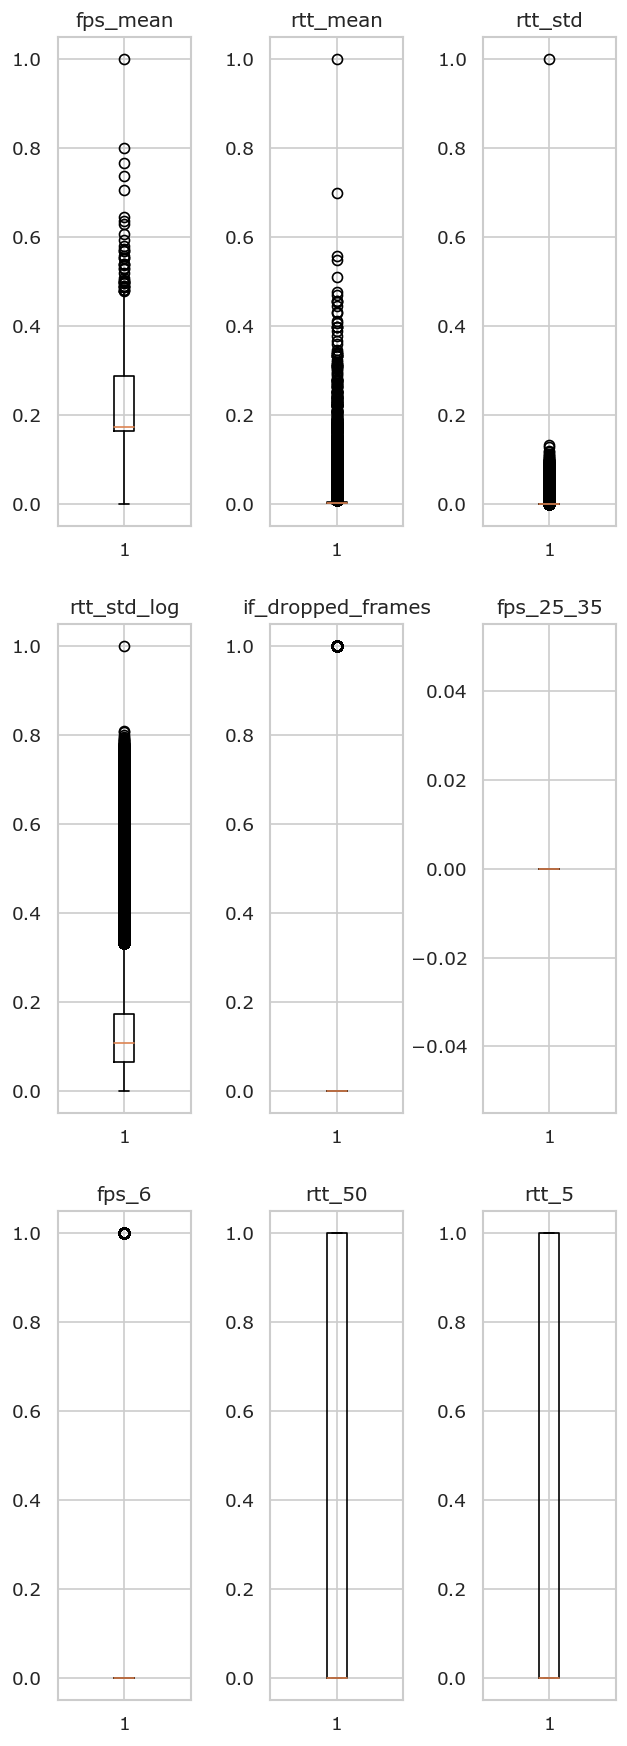

In [27]:
whiskers = show_boxplot(X)


In [28]:
X.head()


,fps_mean,rtt_mean,rtt_std,rtt_std_log,if_dropped_frames,fps_25_35,fps_6,rtt_50,rtt_5
0,0.124352,0.007063,0.000165,0.179534,0.0,0.0,0.0,1.0,1.0
1,0.160622,0.007730,0.000391,0.260757,0.0,0.0,0.0,1.0,1.0
2,0.172712,0.007606,0.000290,0.232511,0.0,0.0,0.0,1.0,1.0
3,0.175302,0.007706,0.000320,0.241750,0.0,0.0,0.0,1.0,1.0
4,0.171848,0.009552,0.001534,0.389541,0.0,0.0,0.0,1.0,1.0


## Train Set Splitting

The training set is split into groups and has validation set.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125)


## Models Build, Train and Test

In [30]:
def show_linear_metrics(y_true: Any, y_pred: Any) -> None:
    """Prints linear metrics.

    Parameters
    ----------
    y_pred : np.array
        y predicted
    """
    print("Mean Absolute Error:", mean_absolute_error(y_true=y_true, y_pred=y_pred))
    print("Mean Squared Error", mean_squared_error(y_true=y_true, y_pred=y_pred))
    print(
        "Root Mean Squared Error:",
        mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False),
    )
    print("R^2 Score", r2_score(y_true=y_true, y_pred=y_pred))

    return pd.DataFrame(data={"Actual": y_true, "Predicted": y_pred}).reset_index(
        drop=True
    )


### Linear Regression Model

__Algorithm__

* Creation of simple regression models.
    * Linear Regression.
    * Linear Regression model with Lasso regularization.
    * Linear Regression model with Ridge regularization.
    * Linear Regression model with Polynomial features.
* Coefficients observation to determine features contribution.
* Hyperparameters optimization (GridSearchCV).

__Results__

`fps_25_35` and `fps_std_log` do not contribute into models. It is possible to exclude them from analysis.

In [31]:
linear_regression = LinearRegression().fit(X=X_train, y=y_train)

y_pred = linear_regression.predict(X=X_test)

print("Model Intercept:", linear_regression.intercept_)

model_df = pd.DataFrame(
    data={
        "Model Coefficient": linear_regression.coef_,
    },
    index=X_train.columns,
)


Model Intercept: 5334.518546120996


In [32]:
model_df


,Model Coefficient
fps_mean,1.351319e+04
rtt_mean,-4.216244e+04
rtt_std,6.858618e+04
rtt_std_log,2.511803e+03
if_dropped_frames,1.984814e+03
fps_25_35,1.577973e-10
fps_6,-3.895449e+02
rtt_50,-2.085815e+03
rtt_5,-1.708879e+03


In [33]:
show_linear_metrics(y_true=y_test, y_pred=y_pred)


Mean Absolute Error: 4431.50731155366
Mean Squared Error 32906105.05144433
Root Mean Squared Error: 5736.384318666623
R^2 Score 0.09194474085285309


,Actual,Predicted
0,10057.0,7797.042978
1,458.0,6934.600594
2,5662.7,6357.050635
3,3510.0,4514.087083
4,25.0,3877.972444
...,...,...
300021,6212.7,7847.264992
300022,2760.5,4561.146206
300023,10736.9,7705.566285
300024,3537.0,7506.893701


### Lasso Model

In [34]:
# LassoCV

lasso_cv = LassoCV().fit(X=X_train, y=y_train)
y_pred = lasso_cv.predict(X=X_test)

lasso_cv.score(X=X_test, y=y_test)


0.09177367641794187

In [35]:
# lasso = Lasso(alpha=1).fit(X=X_train, y=y_train)
# y_pred = lasso.predict(X=X_test)


In [36]:
show_linear_metrics(y_true=y_test, y_pred=y_pred)


Mean Absolute Error: 4433.453923080592
Mean Squared Error 32912304.084167343
Root Mean Squared Error: 5736.92461900689
R^2 Score 0.09177367641794187


,Actual,Predicted
0,10057.0,7823.758277
1,458.0,6935.680898
2,5662.7,6354.760150
3,3510.0,4425.163980
4,25.0,3865.087102
...,...,...
300021,6212.7,7879.785544
300022,2760.5,4475.826925
300023,10736.9,7709.535276
300024,3537.0,7460.033758


### Ridge Model

In [37]:
# RidgeCV

ridge_cv = RidgeCV().fit(X=X_train, y=y_train)
y_pred = ridge_cv.predict(X=X_test)

ridge_cv.score(X=X_test, y=y_test)


0.09198651161952953

In [38]:
ridge_cv.alpha_


0.1

In [39]:
# ridge = Ridge(alpha=1).fit(X=X_train, y=y_train)
# y_pred = ridge.predict(X=X_test)


In [40]:
show_linear_metrics(y_true=y_test, y_pred=y_pred)


Mean Absolute Error: 4431.785323095405
Mean Squared Error 32904591.36246727
Root Mean Squared Error: 5736.252379600053
R^2 Score 0.09198651161952953


,Actual,Predicted
0,10057.0,7800.789637
1,458.0,6922.625654
2,5662.7,6349.653660
3,3510.0,4511.799155
4,25.0,3888.025514
...,...,...
300021,6212.7,7855.617604
300022,2760.5,4542.417933
300023,10736.9,7700.181896
300024,3537.0,7489.177584


### Polynomial Regression Model

In [41]:
pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

param_grid = {"polynomialfeatures__degree": np.arange(2, 5)}

polynomial_regression = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=10,
    return_train_score=True,
)
polynomial_regression.fit(X=X_train, y=y_train)

y_pred = polynomial_regression.predict(X=X_test)

degree = polynomial_regression.best_params_["polynomialfeatures__degree"]

print("Degree:", degree)


Degree: 3


In [42]:
show_linear_metrics(y_true=y_test, y_pred=y_pred)


Mean Absolute Error: 4916.756284088276
Mean Squared Error 89959271345.90756
Root Mean Squared Error: 299932.1112283704
R^2 Score -2481.456958275319


,Actual,Predicted
0,10057.0,8032.345977
1,458.0,3954.970694
2,5662.7,3836.190073
3,3510.0,4729.555470
4,25.0,2960.805470
...,...,...
300021,6212.7,7601.006510
300022,2760.5,5437.180470
300023,10736.9,7175.406708
300024,3537.0,5515.233193


## Models Evaluation

__Results__

Low coefficients show better results.

The performance is the same for simple linear models.

Root Mean Square Error changes accordingly against complexity of models.

High polynomial degrees improve quality of the predictions on the training dataset.

Should be aware of model overfitting.

In [43]:
models = {
    "Linear": linear_regression,
    "Lasso": lasso_cv,
    "Ridge": ridge_cv,
    "Polynomial": polynomial_regression,
}


__Algorithm__

* Choosing the best model.

__Results__

`Polynomial` model performance is the best.

Root Mean Square Error indicates that there is no overfitting of the models.

`Polynomial` model slightly overfits.

In [44]:
columns = [
    "Model",
    "Mean Absolute Error",
    "Mean Squared Error",
    "Root Mean Squared Error",
    "R^2",
]
eval_df = pd.DataFrame(columns=columns)

for model_label, model_estimator in models.items():
    y_pred = model_estimator.predict(X=X_test)

    eval_df = pd.concat(
        [
            eval_df,
            pd.DataFrame(
                data={
                    "Model": model_label,
                    "Mean Absolute Error": mean_absolute_error(
                        y_true=y_test, y_pred=y_pred
                    ),
                    "Mean Squared Error": mean_squared_error(
                        y_true=y_test, y_pred=y_pred
                    ),
                    "Root Mean Squared Error": mean_squared_error(
                        y_true=y_test, y_pred=y_pred, squared=False
                    ),
                    "R^2": r2_score(y_true=y_test, y_pred=y_pred),
                },
                index=[0],
            ),
        ],
        ignore_index=True,
    )

eval_df


,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2
0,Linear,4431.507312,3.290611e+07,5736.384319,0.091945
1,Lasso,4433.453923,3.291230e+07,5736.924619,0.091774
2,Ridge,4431.785323,3.290459e+07,5736.252380,0.091987
3,Polynomial,4916.756284,8.995927e+10,299932.111228,-2481.456958


__Algorithm__

* K-Fold analysis usage.
* Stability observation and overfitting analysis.

__Results__

Complicated models perform worse on validation data against the train data.

`Polynomial` seems to be a good compromise of stability.

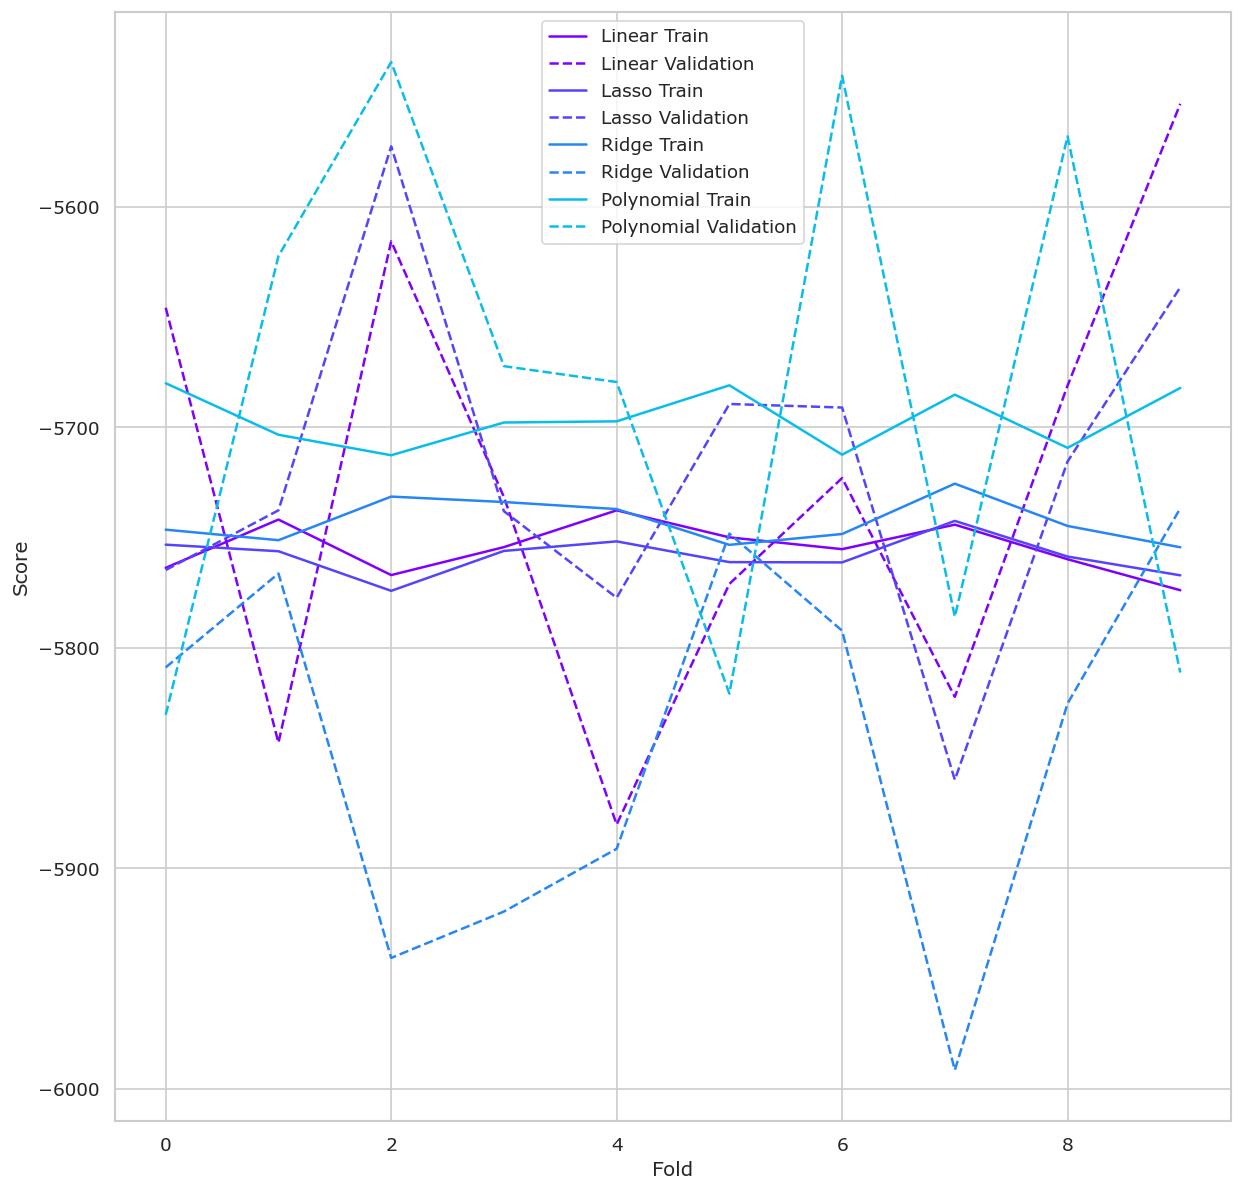

In [45]:
# Evaluate models using crossvalidation
folds = 10
colors = plt.cm.rainbow(np.linspace(0.0, 0.8, folds))

subplot = plt.subplot()
subplot.figure.set_figwidth(12)
subplot.figure.set_figheight(12)
subplot.figure.set_dpi(120)

subplot.set_xlabel("Fold")
subplot.set_ylabel("Score")

for index, (model_label, model_estimator) in enumerate(models.items()):
    score = cross_validate(
        estimator=model_estimator,
        X=X_val,
        y=y_val,
        scoring="neg_root_mean_squared_error",
        cv=ShuffleSplit(folds),
        return_train_score=True,
    )

    subplot.plot(
        np.arange(start=0, stop=folds),
        score["train_score"],
        label=f"{model_label} Train",
        color=colors[index],
        linestyle="solid",
    )
    subplot.plot(
        np.arange(start=0, stop=folds),
        score["test_score"],
        label=f"{model_label} Validation",
        color=colors[index],
        linestyle="dashed",
    )

subplot.legend(loc="best")
plt.show()


In [46]:
columns = ["Model", "Fold", "Train Score", "Validation Score"]
eval_df = pd.DataFrame(columns=columns)

for model_label, model_estimator in models.items():
    for index, fold in enumerate(np.arange(start=0, stop=folds)):
        eval_df = pd.concat(
            [
                eval_df,
                pd.DataFrame(
                    data={
                        "Model": model_label,
                        "Fold": fold,
                        "Train Score": score["train_score"][index],
                        "Validation Score": score["test_score"][index],
                    },
                    index=[0],
                ),
            ],
            ignore_index=True,
        )

eval_df


,Model,Fold,Train Score,Validation Score
0,Linear,0,-5679.922227,-5830.355631
1,Linear,1,-5703.309678,-5622.230090
2,Linear,2,-5712.602916,-5534.225423
3,Linear,3,-5697.744818,-5672.177764
4,Linear,4,-5697.218418,-5679.382684
5,Linear,5,-5680.868838,-5820.749855
6,Linear,6,-5712.353392,-5540.373340
7,Linear,7,-5685.111738,-5785.872444
8,Linear,8,-5709.245679,-5567.907564
9,Linear,9,-5682.076344,-5811.187845


# Stream Quality (Classification)

## Data Preprocessing

In [47]:
# Reading train and test datasets (.csv files)
df_s_train = pd.read_csv("stream_quality_data/train_data.csv")
df_s_test = pd.read_csv("stream_quality_data/train_data.csv")

# Combining two dataframes (.csv)
df_s = pd.concat(objs=[df_s_train, df_s_test]).reset_index(drop=True)


## Data Exploration & Visualization (Part 1)

### Data Profiling

In [48]:
# Generating Pandas Profiling report
# ProfileReport(df=df_s).to_file(output_file="df_s_before.html")


### Column Data Types

In [49]:
df_s.dtypes

fps_mean               float64
fps_std                float64
fps_lags                 int64
rtt_mean               float64
rtt_std                float64
dropped_frames_mean    float64
dropped_frames_std     float64
dropped_frames_max     float64
auto_bitrate_state      object
auto_fec_state          object
auto_fec_mean          float64
stream_quality           int64
dtype: object

In [50]:
df_s["auto_bitrate_state"].unique()


array(['off', 'full', 'partial'], dtype=object)

In [51]:
df_s["auto_fec_state"].unique()


array(['partial', 'off'], dtype=object)

### Pandas Head

In [52]:
df_s.head(10)


,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state,auto_fec_state,auto_fec_mean,stream_quality
0,24.4,0.516398,0,91.1,6.723921,0.0,0.0,0.0,off,partial,50.0,0
1,28.6,2.065591,0,99.7,15.923777,0.0,0.0,0.0,off,partial,50.0,0
2,30.0,0.000000,0,98.1,11.798776,0.0,0.0,0.0,off,partial,50.0,0
3,30.3,0.948683,0,99.4,13.014522,0.0,0.0,0.0,off,partial,50.0,0
4,29.9,0.316228,0,123.2,62.476307,0.0,0.0,0.0,off,partial,50.0,0
5,29.5,1.649916,0,131.2,114.257798,0.0,0.0,0.0,off,partial,50.0,0
6,24.3,0.483046,0,98.3,16.499495,0.0,0.0,0.0,off,partial,50.0,0
7,24.5,0.971825,0,141.9,103.814418,0.0,0.0,0.0,off,partial,50.0,0
8,30.0,0.000000,0,107.5,18.733511,0.0,0.0,0.0,off,partial,50.0,0
9,30.0,0.471405,0,108.2,10.952422,0.0,0.0,0.0,off,partial,50.0,0


### Pandas Describe

In [53]:
df_s.describe()


,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_fec_mean,stream_quality
count,813144.000000,813144.000000,813144.000000,813144.00000,813144.000000,8.131440e+05,8.131440e+05,8.131440e+05,813144.000000,813144.000000
mean,34.497561,2.285486,0.183151,54.31440,19.525019,1.730432e+06,1.378279e+05,1.893339e+06,51.413536,0.068460
std,11.625487,3.708528,1.099383,133.87198,156.364241,4.930088e+07,9.229770e+06,5.241000e+07,34.836023,0.252534
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,28.300000,0.316228,0.000000,14.10000,0.699206,0.000000e+00,0.000000e+00,0.000000e+00,50.000000,0.000000
50%,30.000000,0.994429,0.000000,32.30000,1.490712,0.000000e+00,0.000000e+00,0.000000e+00,50.000000,0.000000
75%,43.000000,2.590581,0.000000,57.10000,5.334375,0.000000e+00,0.000000e+00,0.000000e+00,50.000000,0.000000
max,127.100000,312.540842,10.000000,12898.40000,40721.933293,2.097289e+09,9.963751e+08,2.097289e+09,250.000000,1.000000


### Missing Values

In [54]:
df_s.isna().any()


fps_mean               False
fps_std                False
fps_lags               False
rtt_mean               False
rtt_std                False
dropped_frames_mean    False
dropped_frames_std     False
dropped_frames_max     False
auto_bitrate_state     False
auto_fec_state         False
auto_fec_mean          False
stream_quality         False
dtype: bool

__Observations__

Most of the features are the same as in the previous task.

Two categorial features are added (`auto_bitrate_state`, `auto_fec_state`).

__Conclusions__

In `auto_bitrate_state` it is possible to consider `partial` values as `full` values.

`stream_quality` (`target`) is imbalanced.

## Feature Engineering (Part 1)

In [55]:
df_s_e = df_s.copy()


In [56]:
# Label Encoding
df_s_e["auto_bitrate_state"] = np.int0(df_s_e["auto_bitrate_state"] != "off")
df_s_e["auto_fec_state"] = np.int0(df_s_e["auto_fec_state"] != "off")


## Data Exploration & Visualization (Part 2)

### Box Plots (Data Distribution & Outliers)

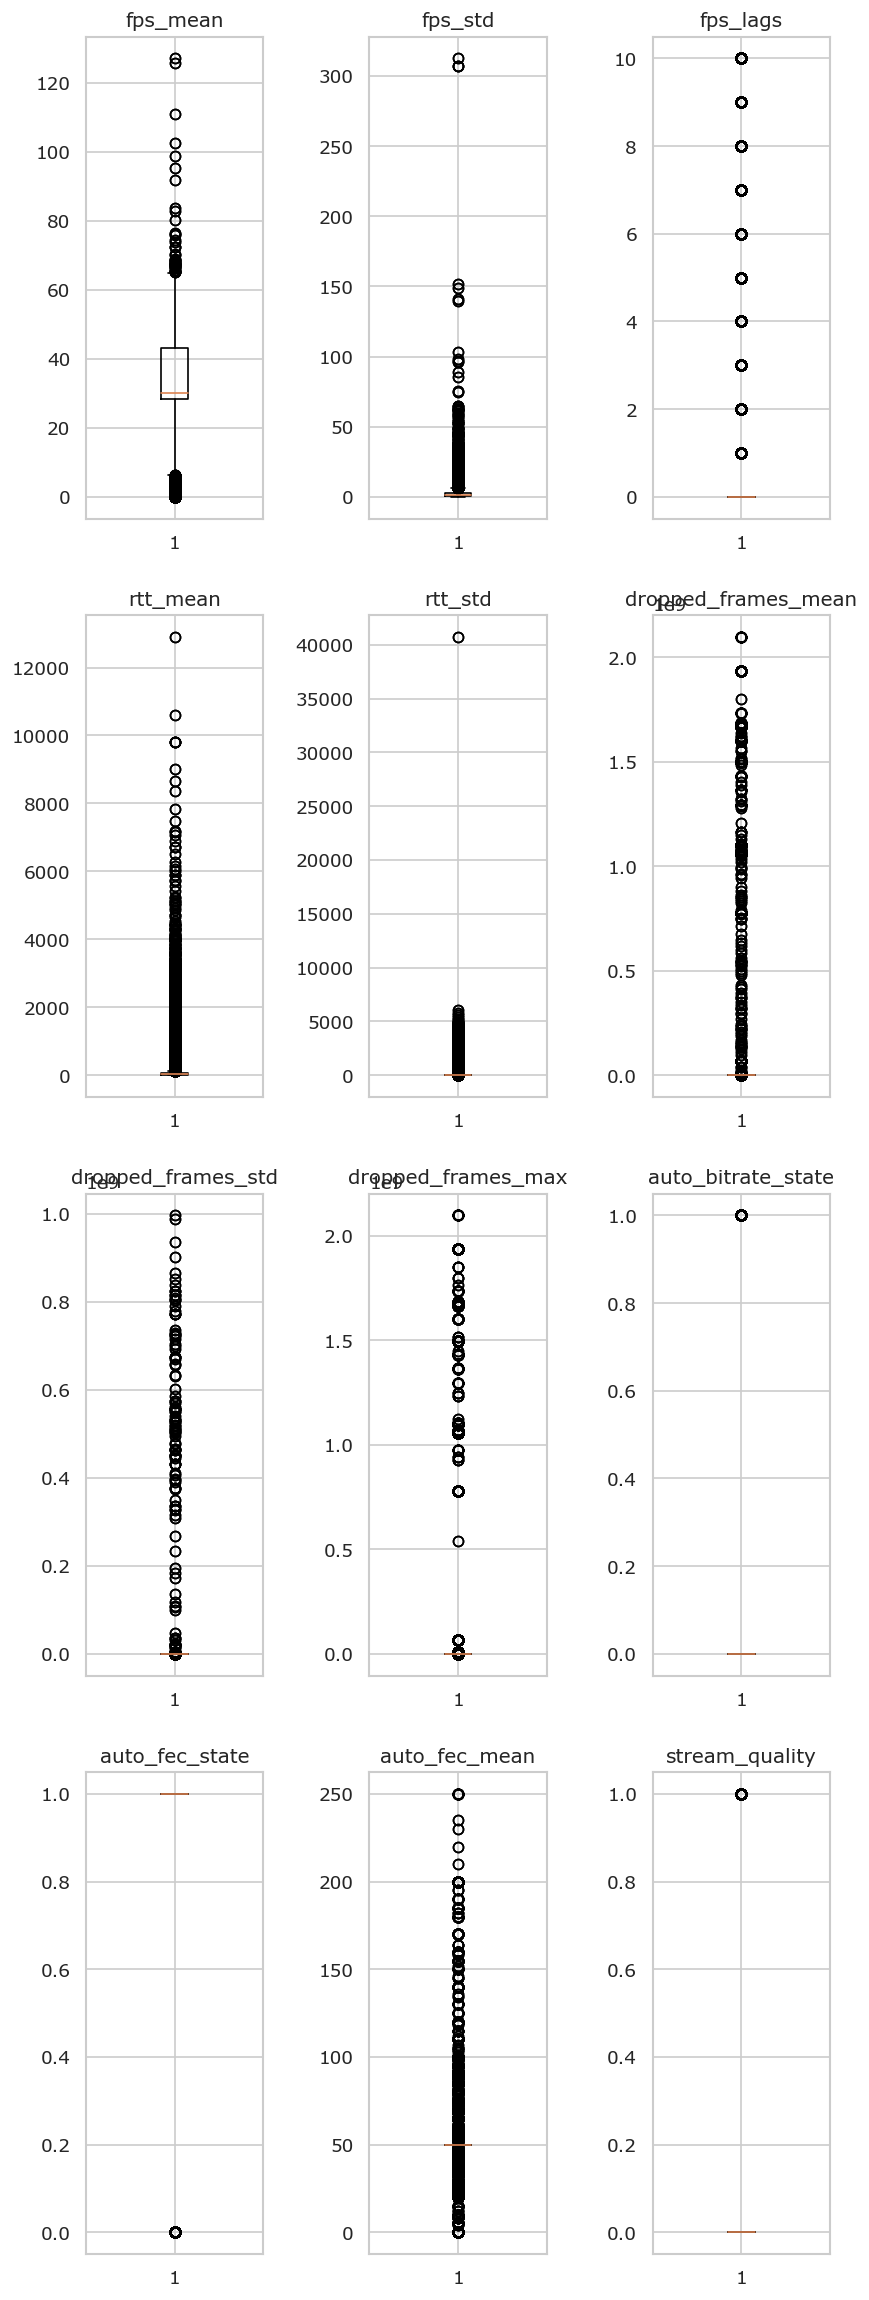

In [57]:
whiskers = show_boxplot(df_s_e)


### Correlation Matrix

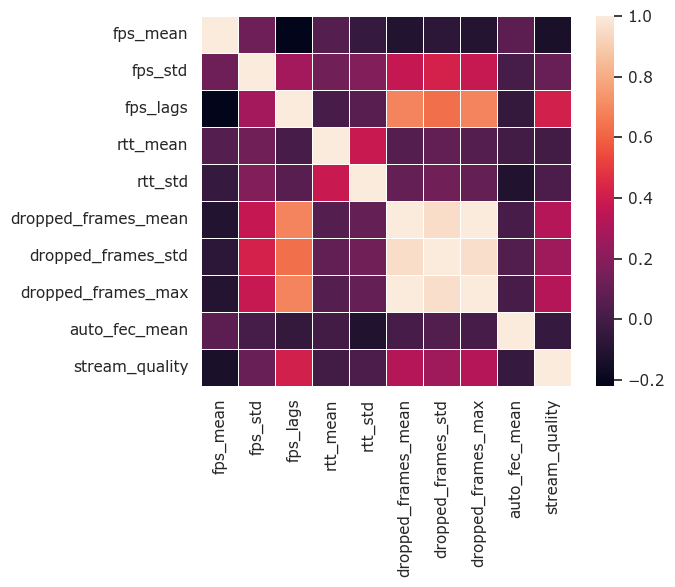

In [58]:
sns.heatmap(df_s.corr(method="spearman"), linewidths=.5, square=True)

plt.show()


__Observations__

`dropped_frames` features correlate with each other.

`fps_lags` feature correlates with `stream_quality`.

__Conclusions__

We might drop `dropped_frames`.

`fps_lags` features are important.

### Pair Plot

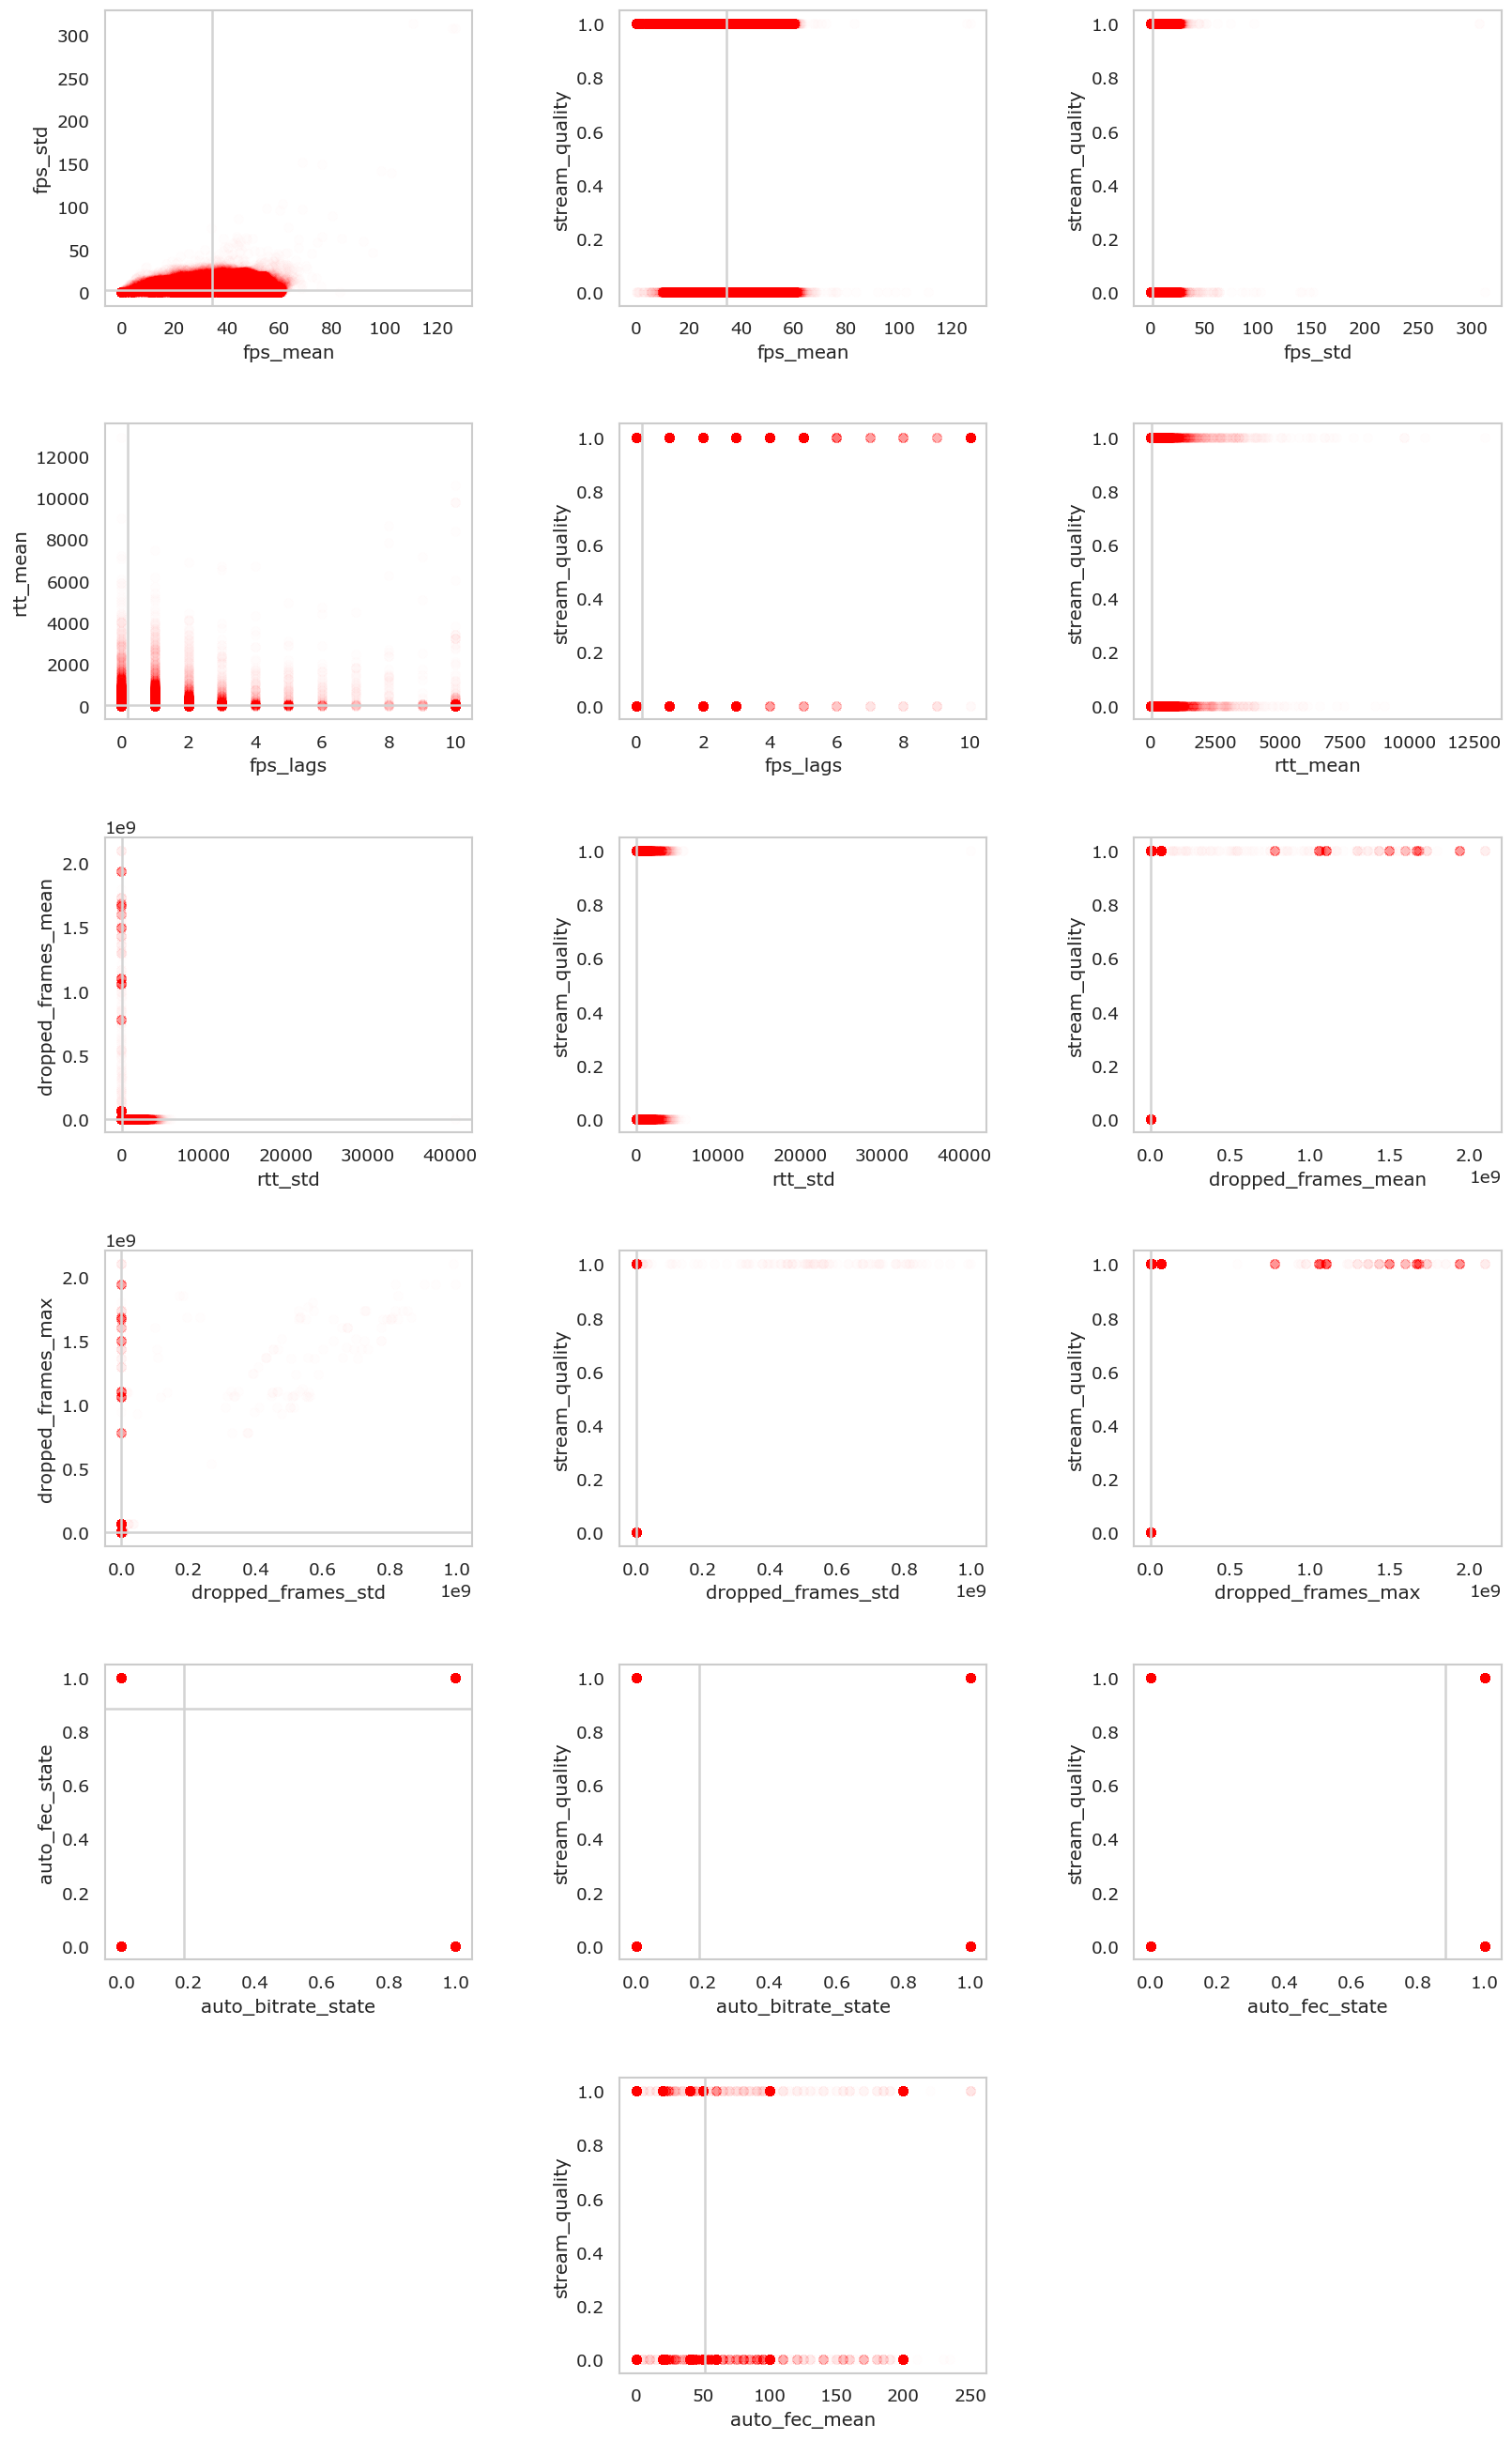

In [59]:
show_pairplot(data_frame=df_s_e, target_column="stream_quality")


__Observations__

High `fps_lags` features correlate with `stream_quality`.

Non-zero `dropped_frames` correlate with `stream_quality`.

`auto_fec_mean` features correlate with `stream_quality`.

__Conclusions__

It is possible to add a categorical feature which represents `fps_lags` > `2`.

It is possible to add a categorical feature which represents whether the frames were dropped.

It is possible to add a categorical feature which represents high values of `auto_fec_mean`.

Should keep extra categorical features from the previous task.

## Feature Engineering (Part 2)

__Algorithm__

* Data transformation.
* Features evaluation using classification model coefficients.
* Outliers removal.
* Application of categorical features.
* Data scaling.
* Duplicates removal.

__Results__

The dataset has been reduced by ≈ 50 %.

In [60]:
# Outliers
remove_outliers(data_frame=df_s_e, whiskers=whiskers, padding=10)


In [61]:
# Binary features
df_s_e["fps_20_30"] = (df_s_e["fps_mean"] < 20) & (df_s_e["fps_mean"] > 30)
df_s_e["fps_5"] = df_s_e["fps_std"] > 5
df_s_e["fps_lags_2"] = df_s_e["fps_lags"] > 2
df_s_e["rtt_50"] = df_s_e["rtt_mean"] > 50
df_s_e["if_dropped_frames"] = df_s_e["dropped_frames_mean"] > 0
df_s_e["auto_fec_mean_50"] = df_s_e["auto_fec_mean"] > 50


In [62]:
# Redundant columns
df_s_e = df_s_e.drop(
    columns=[
        "dropped_frames_mean",
        "dropped_frames_max",  # highly correlates with other features
    ],
    axis=1,
)


In [63]:
# Duplicates
df_s_e = df_s_e.drop_duplicates()


In [64]:
# After filtering
reduction = (1 - df_s_e.shape[0] / df_s.shape[0]) * 100

print(f"Before: {df_s.shape}.")
print(f"After: {df_s_e.shape}.")
print(f"Filtered Volume: {reduction:.0f} %.")


Before: (813144, 12).
After: (373051, 16).
Filtered Volume: 54 %.


### Features Scaling

In [65]:
X = df_s_e.drop(columns=["stream_quality"], axis=1)
y = df_s_e.stream_quality


In [66]:
# Scaler
X[:] = MinMaxScaler().fit_transform(X=X, y=y)


## Train Set Splitting

The training set is split into groups and has validation set.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125)


## Models Build, Train and Test

__Algorithm__

* Observe model coefficients.
* Determine features contribution.

__Results__

Most features do not affect the model but have worthy coefficients.

It is possible to apply PCA to join all questionable features.

### Logistic Regression

In [68]:
logistic_regression = LogisticRegression().fit(X_train, y_train)

pd.DataFrame(data={"Coef_": logistic_regression.coef_.flatten()}, index=X_train.columns)


/Users/vaceslavblinov/opt/anaconda3/envs/innopolis/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Coef_
fps_mean,-2.409856
fps_std,6.137377
fps_lags,6.823491
rtt_mean,2.951379
rtt_std,1.878044
dropped_frames_std,0.201510
auto_bitrate_state,0.265123
auto_fec_state,0.514770
auto_fec_mean,-0.591511
fps_20_30,0.000000


### Logistic Regression with PCA

In [69]:
X_train_pca = X_train.copy()
X_test_pca = X_test.copy()


In [70]:
features = [
    "fps_20_30",
    "fps_5",
    "fps_lags_2",
    "rtt_50",
    "dropped_frames_std",
    "auto_bitrate_state",
    "auto_fec_state",
    "auto_fec_mean",
    "auto_fec_mean_50",
]

pca = PCA(n_components=1).fit(X=X_train_pca[features])
X_train_pca["PCA"] = pca.transform(X=X_train_pca[features])

X_train_pca = X_train_pca.drop(features, axis=1)


In [71]:
logistic_regression_pca = LogisticRegression().fit(X_train_pca, y_train)

pd.DataFrame(
    data={"Coef_": logistic_regression_pca.coef_.flatten()}, index=X_train_pca.columns
)


,Coef_
fps_mean,-2.200006
fps_std,8.208278
fps_lags,6.972271
rtt_mean,2.808639
rtt_std,1.843315
if_dropped_frames,1.329776
PCA,0.367747


__Results__

The output barely changes.

PCA usage is redundant.

## Model Validation

__Algorithm__

* Balance the `target`.

__Results__

Weighted coefficients usage.

In [72]:
logistic_regression = LogisticRegression(class_weight="balanced", max_iter=1000).fit(
    X=X_train, y=y_train
)

y_pred = logistic_regression.predict_proba(X=X_test)[:, 0] < 0.5


In [73]:
def show_classification_metrics(y_true: Any, y_pred: Any) -> None:
    print("Accuracy Score:", accuracy_score(y_true=y_true, y_pred=y_pred))
    print(
        "Precision Score:",
        precision_score(y_true=y_true, y_pred=y_pred, average="weighted"),
    )
    print(
        "Recall Score:", recall_score(y_true=y_true, y_pred=y_pred, average="weighted")
    )
    print("F1-Score:", f1_score(y_true=y_true, y_pred=y_pred, average="weighted"))

    print(
        "Precision Score (Unweighted):", precision_score(y_true=y_true, y_pred=y_pred)
    )


Accuracy score calculates the overall correspondance within true and predicted labels. Weighted score is not applicable.

Precision score is hardly gained as TP values will be lower than FP in many cases.

In [74]:
show_classification_metrics(y_test, y_pred)


Accuracy Score: 0.8687636040015869
Precision Score: 0.9173401154568291
Recall Score: 0.8687636040015869
F1-Score: 0.889004944701678
Precision Score (Unweighted): 0.2429727079588168


In [75]:
def show_confusion_matrix(y_true, y_pred) -> None:
    c_m = confusion_matrix(y_true=y_true, y_pred=y_pred)

    names = ["TN", "FP", "FN", "TP"]
    counts = [f"{value:0.0f}" for value in c_m.flatten()]
    percentages = [f"{value:.2%}" for value in c_m.flatten() / np.sum(c_m)]
    labels = np.array(
        [
            f"{name}\n\n{count}\n\n{percentage}"
            for name, count, percentage in zip(names, counts, percentages)
        ]
    ).reshape(2, 2)

    sns.heatmap(c_m, annot=labels, fmt="", cmap=plt.cm.Blues)

    plt.show()

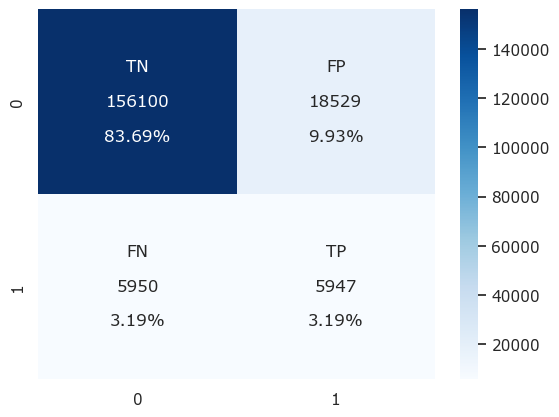

In [76]:
show_confusion_matrix(y_true=y_test, y_pred=y_pred)


__Algorithm__

* Threshold definition.
* Particular metric focusing.

__Results__

F1-Score maximisation (a compromise between precision and recall).

Plotting the thresholds and selecting an optimal one.

In [77]:
thresholds = np.arange(0.0, 1.0, 0.01)

y_proba = logistic_regression.predict_proba(X_test)[:, 0]


In [78]:
precision_scores = [
    precision_score(y_true=y_test, y_pred=y_proba < threshold, zero_division=0)
    for threshold in thresholds
]
recall_scores = [
    recall_score(y_true=y_test, y_pred=y_proba < threshold, zero_division=0)
    for threshold in thresholds
]
f1_scores = [
    f1_score(y_true=y_test, y_pred=y_proba < threshold, zero_division=0)
    for threshold in thresholds
]


In [79]:
precision_scores_weighted = [
    precision_score(
        y_true=y_test, y_pred=y_proba < threshold, average="weighted", zero_division=0
    )
    for threshold in thresholds
]
recall_scores_weighted = [
    recall_score(
        y_true=y_test, y_pred=y_proba < threshold, average="weighted", zero_division=0
    )
    for threshold in thresholds
]
f1_scores_weighted = [
    f1_score(
        y_true=y_test, y_pred=y_proba < threshold, average="weighted", zero_division=0
    )
    for threshold in thresholds
]


In [80]:
optimum = thresholds[np.argmax(f1_scores)]


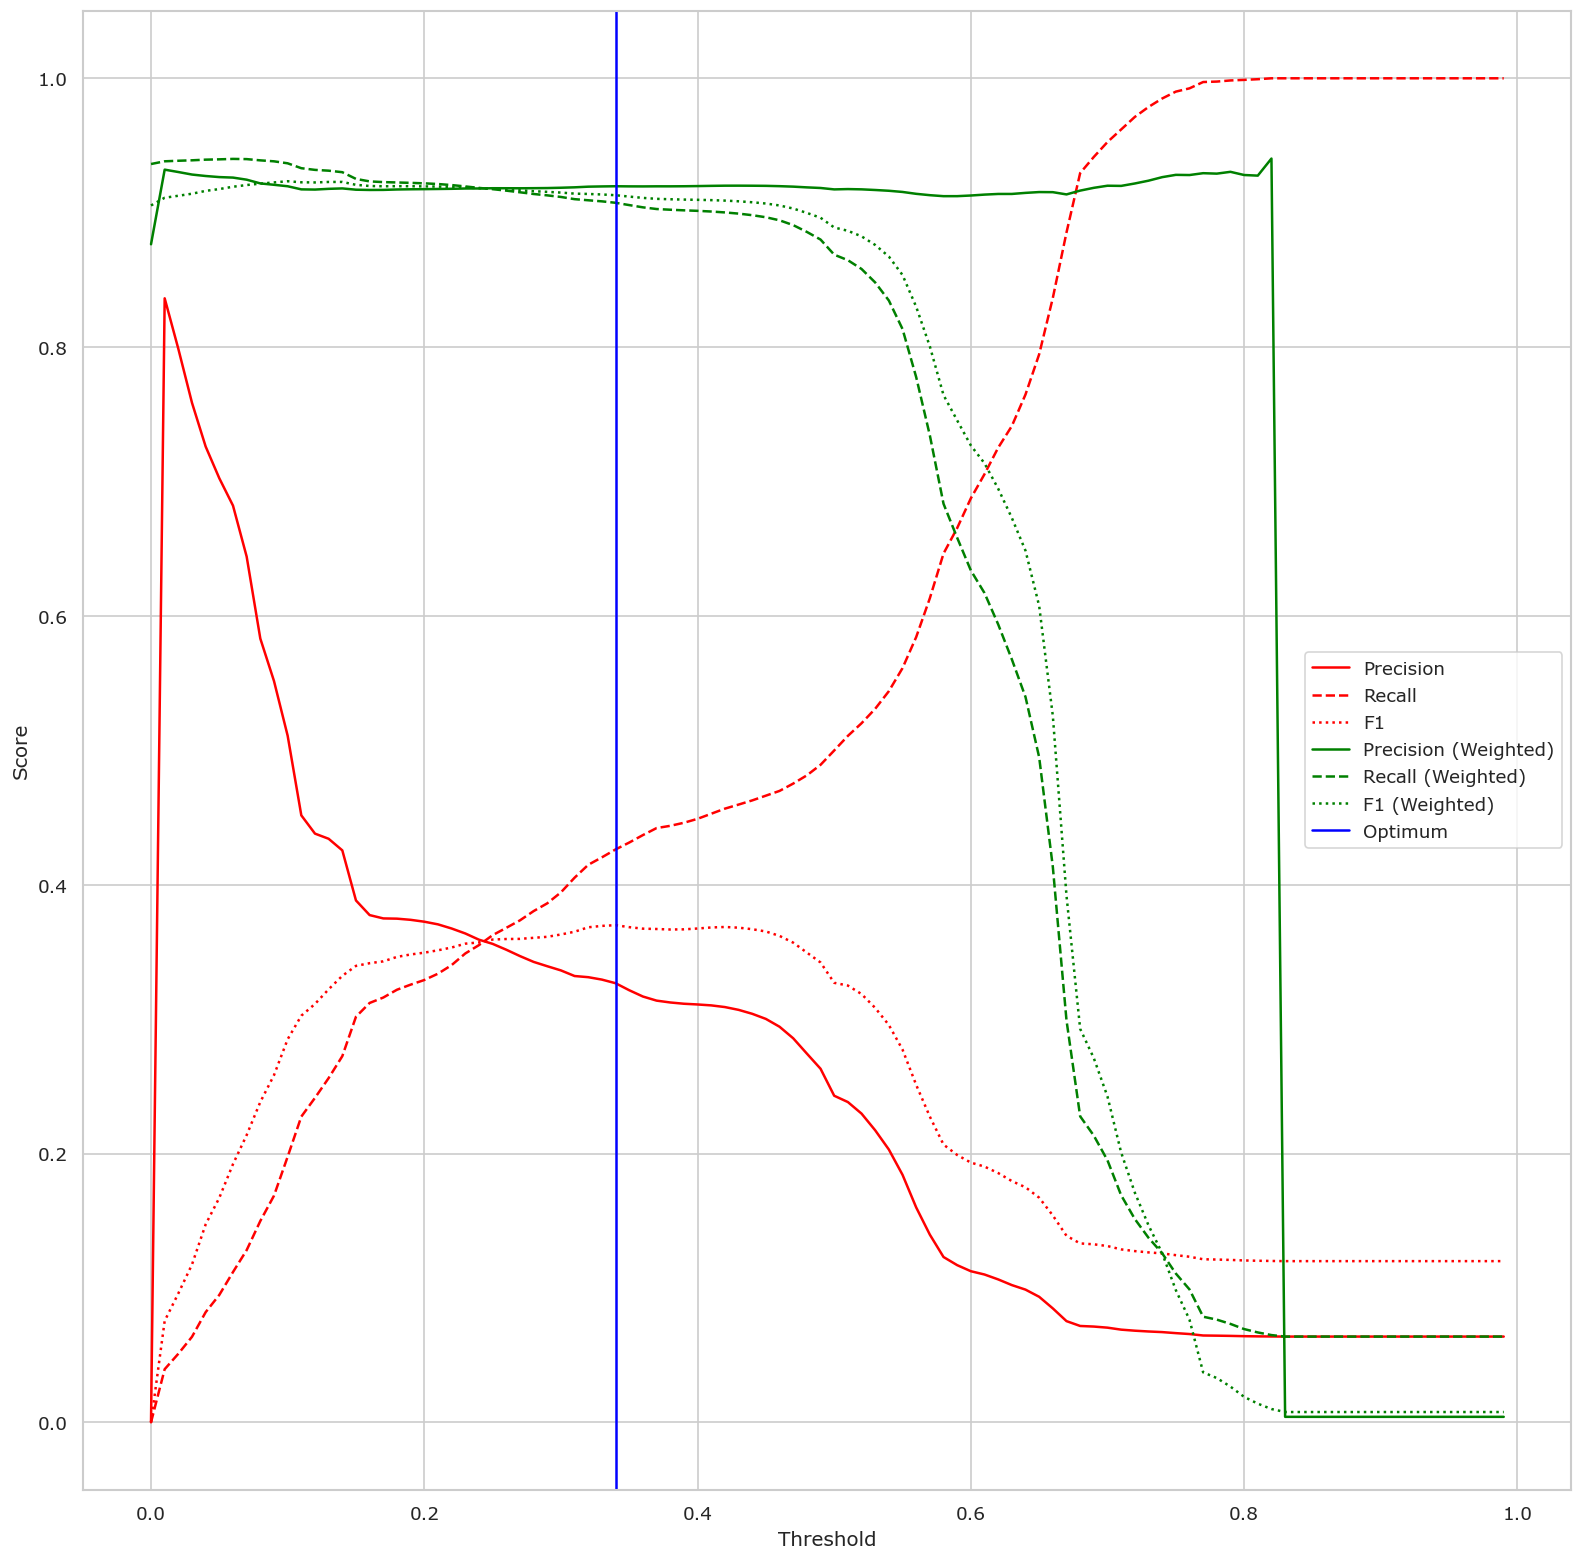

In [81]:
plt.figure(figsize=(16, 16), dpi=120)

plt.xlabel("Threshold")
plt.ylabel("Score")

color = "red"
plt.plot(
    thresholds,
    precision_scores,
    c=color,
    label="Precision",
    linestyle="solid",
)
plt.plot(
    thresholds,
    recall_scores,
    c=color,
    label="Recall",
    linestyle="dashed",
)
plt.plot(thresholds, f1_scores, c=color, label="F1", linestyle="dotted")

color = "green"
plt.plot(
    thresholds,
    precision_scores_weighted,
    c=color,
    label="Precision (Weighted)",
    linestyle="solid",
)
plt.plot(
    thresholds,
    recall_scores_weighted,
    c=color,
    label="Recall (Weighted)",
    linestyle="dashed",
)
plt.plot(
    thresholds, f1_scores_weighted, c=color, label="F1 (Weighted)", linestyle="dotted"
)

color = "blue"
plt.axvline(optimum, c=color, label="Optimum")

plt.legend()
plt.show()


It is possible to save time by applying `GridSearchCV` method. It keeps the best estimator and evaluates its stability using cross-validation.

The hyperparameters include `penalty`, `max_iter`, `class_weight`.

In [82]:
logistic_regression = LogisticRegression()

grid = GridSearchCV(
    estimator=logistic_regression,
    param_grid={
        "penalty": ["l1", "l2", "elasticnet"],
        "max_iter": np.arange(start=200, stop=1100, step=100),
        "class_weight": [None, "balanced"],
    },
    cv=10,
    verbose=1,
)

grid.fit(X=X_train, y=y_train)


Fitting 10 folds for each of 54 candidates, totalling 540 fits


/Users/vaceslavblinov/opt/anaconda3/envs/innopolis/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vaceslavblinov/opt/anaconda3/envs/innopolis/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_iter': array([ 200,  300,  400,  500,  600,  700,  800,  900, 1000]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

The result model has the following hyperparameters.

The result is expected, as `GridSearchCV` selects the best model in the current scope without context and can be used repetitively.

In [83]:
grid.best_params_


{'class_weight': None, 'max_iter': 200, 'penalty': 'l2'}

## Model Evaluation

In [84]:
y_pred = grid.predict(X_test)


In [85]:
show_classification_metrics(y_test, y_pred)


Accuracy Score: 0.9398207220441118
Precision Score: 0.927098282884633
Recall Score: 0.9398207220441118
F1-Score: 0.9176805112662842
Precision Score (Unweighted): 0.7115869017632241


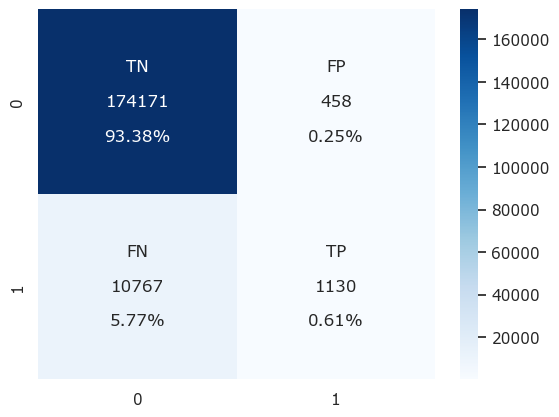

In [86]:
show_confusion_matrix(y_true=y_test, y_pred=y_pred)
